# PRACTICE Exam #2 - EDA, Statistics and Visualization

For this part, you will work with data that was collected in order to predict a car's selling price.

## Data Dictionary

**name**: Name of the cars

**year**: Year of the car when it was bought

**selling_price**: Price at which the car is being sold

**km_driven**: Number of Kilometres the car is driven

**fuel**: Fuel type of car (petrol / diesel / CNG / LPG / electric)

**seller_type**: Tells if a Seller is Individual or a Dealer

**transmission**: Gear transmission of the car (Automatic/Manual)

**owner**: Number of previous owners of the car.


<div class="alert alert-warning">
<b>Important:</b> Make sure you follow what we learned regarding what should be done on the train set and what should be done on the test set
</div>

<div class="alert alert-info">
<b>Note:</b> You should submit the answers to this question in a report format - everything you do should be documented, you should track the changes to the shape of your dataset, explain the business thought behind your decisions and make everything super clear
</div>

<div class="alert alert-warning">
<b>Important:</b> Do not perform actions that are not neccessary. Make sure there is a thought behind each step you take
</div>

**Here are some packages you will need:**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

**Here are some helper functions for your use:**

In [2]:
def get_redundant_binary_cols(data, threshold):
    '''
    This function gets a pandas DataFrame, and a threshold (% of data),
    and returns the list of binary features from that dataframe that have
    above threshold amount of samples with the same value, and thus
    should be considered redundant.
    '''

    bool_cols = [col for col in data.columns \
                 if pd.Series(list(set(data[col]))).isin([0, 1]).all()]


    return [x for x in bool_cols if data[x].value_counts()[0] \
                                                > threshold * len(X_train)] + \
                    [x for x in bool_cols if data[x].value_counts()[1] \
                                                > threshold * len(X_train)]

## Questions:

### 1. Read the data file and explore it lightly. Include data integrity checks that make semse on the entire dataframe

In [3]:
# your code here
df = pd.read_csv('dataset_cars.csv')

#### BASIC EXPLORATION

In [4]:
df.shape

(4340, 8)

In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000.0,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.0,46000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4340 non-null   object 
 1   year           4340 non-null   int64  
 2   selling_price  4339 non-null   float64
 3   km_driven      4336 non-null   float64
 4   fuel           4337 non-null   object 
 5   seller_type    4340 non-null   object 
 6   transmission   4340 non-null   object 
 7   owner          4340 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 271.4+ KB


In [7]:
df.isna().sum(axis=0)

name             0
year             0
selling_price    1
km_driven        4
fuel             3
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
df.isna().sum(axis=0)/df.shape[0]

name             0.000000
year             0.000000
selling_price    0.000230
km_driven        0.000922
fuel             0.000691
seller_type      0.000000
transmission     0.000000
owner            0.000000
dtype: float64

#### DATA INTEGRITY

In [9]:
assert (df.year.dtype == 'int')

In [10]:
assert df.year.all() < 2023

In [11]:
assert df.year.all() > 0

In [12]:
assert (df.selling_price.dtype == 'float64')

In [13]:
assert df.selling_price.all() > 0

In [14]:
df.selling_price.max()

8900000.0

In [15]:
assert (df.km_driven.dtype == 'float64')

In [16]:
assert df.km_driven.all() >0

In [17]:
df.km_driven.max()

806599.0

In [18]:
assert set(df.fuel.dropna()) == {'CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'}

In [19]:
set(df.seller_type)

{'Dealer', 'Indi', 'Indi.', 'Individual', 'Trustmark Dealer'}

In [20]:
assert set(df.transmission) == {'Automatic', 'Manual'}

In [21]:
set(df.owner)

{'Eighth Owner',
 'Fifth Owner',
 'First Owner',
 'Fourth Owner',
 'Second Owner',
 'Seventh Owner',
 'Sixth Owner',
 'Test Drive Car',
 'Third Owner'}

### 2. We are trying to predict what will be the car's price, per row in the data (car). According to this research question, define the dependent variable, as well as all the categorical (nominal / ordinal) and numerical (discrete/continuous) features, in a markdown cell

dependent variable = 'selling_price'

categorical nominal features = 'name', 'seller_type', 'transmission','fuel'

categorical ordinal features = 'owner'

numerical continuous features = 'year',km_driven'

### 3. Split the data into train and test sets (no validation set)

#### 3.1 Specify your business logic behind this choice.
#### 3.2 Perform more integruity checks on the train set.

In [22]:
# your code here

X = df.drop(columns = ['selling_price'])
y = df.selling_price

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

We do not have any cluster in our dataset neither any ordered data neither any imbalanced classes so we can split our dataset randomly.
We put 20% of our data in the test set and use the random_state = 42 in order to keep the same shuffle each time we use our datasets.

In [23]:
X_train.shape

(3472, 7)

In [24]:
X_train.describe()


,year,km_driven
count,3472.000000,3469.000000
mean,2013.116935,66020.777169
std,4.205692,46920.158763
min,1992.000000,1.000000
25%,2011.000000,35000.000000
50%,2014.000000,60000.000000
75%,2016.000000,90000.000000
max,2020.000000,806599.000000


In [25]:
X_train.drop(columns = ['year','km_driven']).describe()

,name,fuel,seller_type,transmission,owner
count,3472,3469,3472,3472,3472
unique,1323,5,4,2,9
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,53,1713,2596,3109,2262


In [26]:
y_train.describe()

count    3.471000e+03
mean     5.077222e+05
std      5.849214e+05
min      2.200000e+04
25%      2.100000e+05
50%      3.500000e+05
75%      6.000000e+05
max      8.150000e+06
Name: selling_price, dtype: float64

In [27]:
y_train.mean()

507722.1694036301

In [28]:
y_train.value_counts()

300000.0     132
250000.0      99
350000.0      98
550000.0      85
600000.0      84
            ... 
509000.0       1
815000.0       1
1230000.0      1
159000.0       1
1825000.0      1
Name: selling_price, Length: 400, dtype: int64

$\color{blue}{\text{From this point forward, answer the questions for both the train and test sets (seperately). e.g. if you transform the train set, make the needed change in the test set as well}}$

### 4. Are there any features that do not have values that match your expectations in terms of data types? Which are those features? Apply transformations so the values of these features will match your expectations.

In [29]:
# your code here
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3472 entries, 227 to 860
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          3472 non-null   object 
 1   year          3472 non-null   int64  
 2   km_driven     3469 non-null   float64
 3   fuel          3469 non-null   object 
 4   seller_type   3472 non-null   object 
 5   transmission  3472 non-null   object 
 6   owner         3472 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 217.0+ KB


The feature 'owner' should be numeric but has an object dtype.
As 'owner' is a categorical ordinal feature, we will use the OrdinalEncoder to transform it.

In [30]:
set(X_train.owner)

{'Eighth Owner',
 'Fifth Owner',
 'First Owner',
 'Fourth Owner',
 'Second Owner',
 'Seventh Owner',
 'Sixth Owner',
 'Test Drive Car',
 'Third Owner'}

In [31]:
oe = OrdinalEncoder(categories = [['Test Drive Car','First Owner','Second Owner','Third Owner','Fourth Owner','Fifth Owner',
                                   'Sixth Owner','Seventh Owner','Eighth Owner']])
oe.fit(X_train[['owner']])
X_train['owner_sklearn']= oe.transform(X_train[['owner']])
X_test['owner_sklearn'] = oe.transform(X_test[['owner']])

X_train.drop(columns = ['owner'], inplace = True)
X_test.drop(columns = ['owner'], inplace = True)


### 5. Plot the distribution per feature.

<ipython-input-32-cd20ee609a25>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation = 45, ha = 'right')


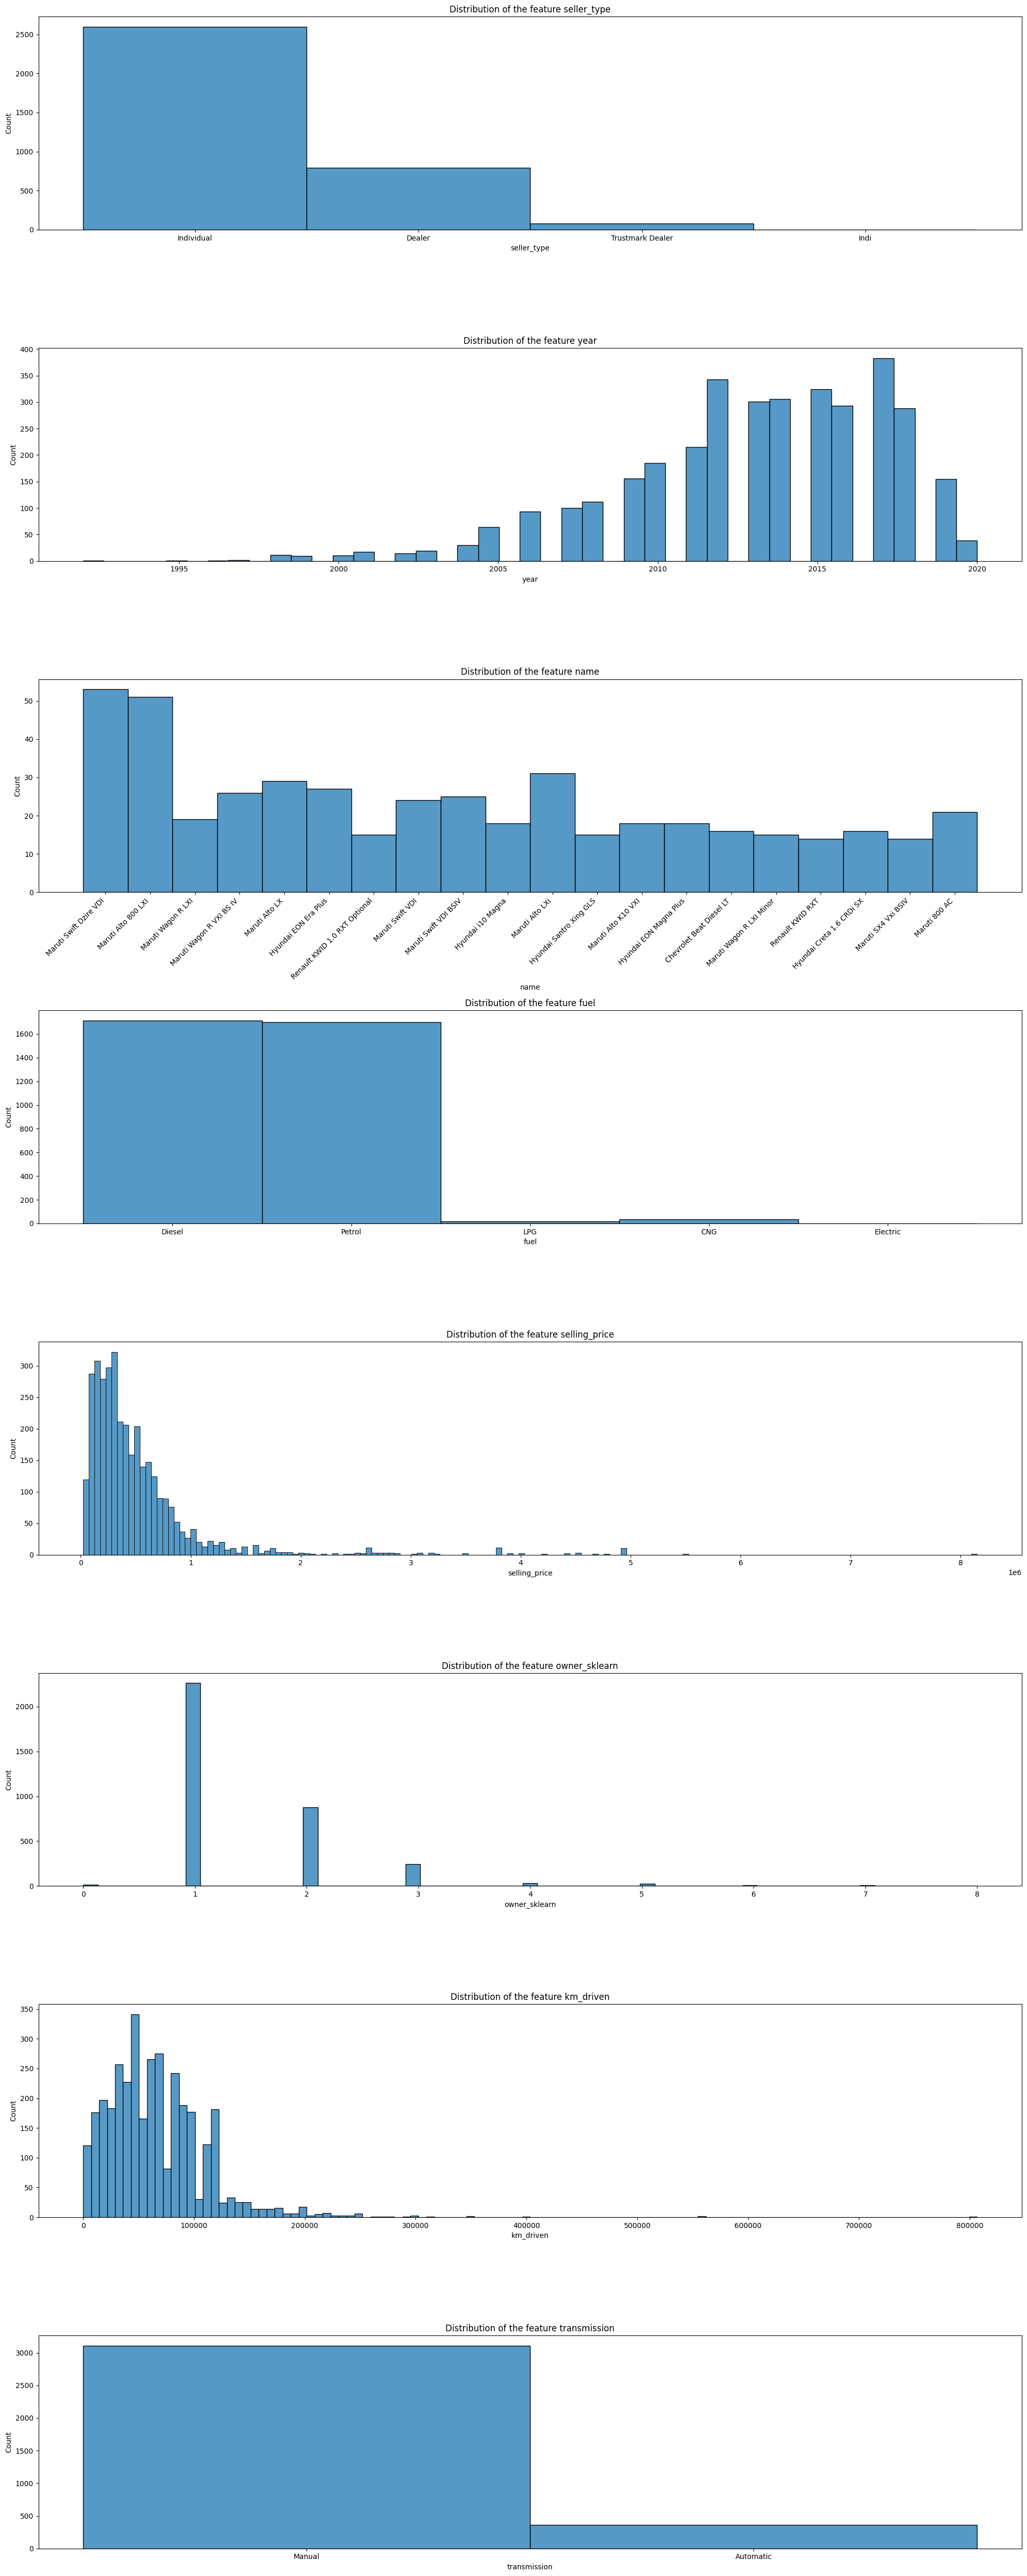

In [32]:
# your code here
f,axes = plt.subplots(8,1,figsize = (20,50))
axes = axes.flatten()
all_columns = set(X_train.columns).union({'selling_price'})
for index,column in enumerate(all_columns):
  if column == 'name':
    top_n = 20
    top_names = X_train.name.value_counts().nlargest(top_n).index
    sns.histplot(x = X_train[X_train.name.isin(top_names)]['name'], ax = axes[index])
    axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation = 45, ha = 'right')
  elif column == 'selling_price':
    sns.histplot(x = y_train, ax = axes[index])
  else:
    sns.histplot(x = X_train[column], ax = axes[index])
  axes[index].set_title(f'Distribution of the feature {column}')


plt.tight_layout()
plt.show()

### 6. Handle missing values and outliers, explaining the business logic behind your choices.

In [33]:
# your code here
X_train.isna().sum()/X_train.shape[0]

name             0.000000
year             0.000000
km_driven        0.000864
fuel             0.000864
seller_type      0.000000
transmission     0.000000
owner_sklearn    0.000000
dtype: float64

We only have a very few missing values in only 2 features. It represents less than 0.1 % of the entire value.
For the feature 'km_driven', we will fill nan values with the median of the feature.
For the feature 'fuel', we will fill nan values with the most represented value.

##### fill nan values

In [34]:
X_train.km_driven.fillna(X_train.km_driven.median(), inplace = True)
X_test.km_driven.fillna(X_train.km_driven.median(), inplace = True)

In [35]:
X_train.fuel.fillna(X_train.fuel.mode()[0], inplace = True)
X_test.fuel.fillna(X_train.fuel.mode()[0], inplace = True)

We check that we do not have nan values anymore

In [36]:
X_train.isna().sum()

name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner_sklearn    0
dtype: int64

In [37]:
X_test.isna().sum()

name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner_sklearn    0
dtype: int64

We drop nan values from the dependant variable

In [38]:
rows_train_to_drop = y_train[y_train.isna()].index

In [39]:
X_train.drop(index = rows_train_to_drop, inplace = True)
y_train.drop(index = rows_train_to_drop, inplace = True)

In [40]:
rows_test_to_drop = y_test[y_test.isna()].index
rows_test_to_drop

Int64Index([], dtype='int64')

In [41]:
X_test.drop(index = rows_test_to_drop, inplace = True)
y_test.drop(index = rows_test_to_drop, inplace = True)

We check that we do not have any nan values left on the dependant variable

In [42]:
assert len(y_train[y_train.isna()]) == 0

In [43]:
assert len(y_test[y_test.isna()]) == 0

##### OUTLIERS

By looking at our plots, we can see that 'km_driven' and 'selling_price' have some outliers values.
They both look normally distributed so we can use the std_method to clip the data.



###### selling_price feature

In [44]:
mean_sp = y_train.mean()
std_sp = y_train.std()

upper_bound = mean_sp + 3 * std_sp

out_bounds_train_sp = y_train > upper_bound

len(y_train[out_bounds_train_sp])

79

We only have 79 values on the feature 'selling_price' that are outliers so we can clip them to the upper_bound.

In [45]:
y_train[y_train > upper_bound] = upper_bound

We check the distribution again :

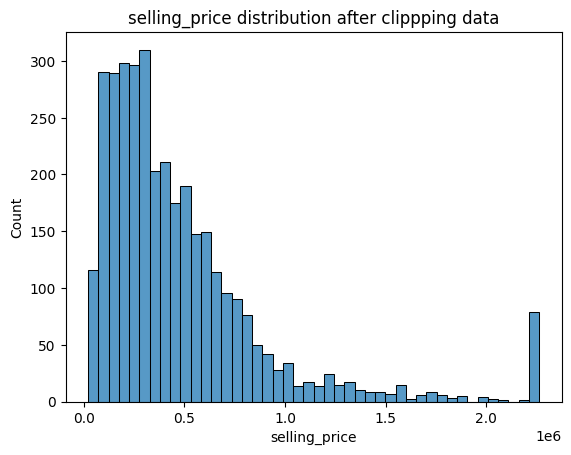

In [46]:
plt.figure()
sns.histplot(x = y_train)
plt.title('selling_price distribution after clippping data')
plt.xlabel('selling_price')
plt.show()

###### km_driven feature

The feature is very skewed but outliers are part of the distribution so we will perform a log transformation.

In [47]:
transformer = FunctionTransformer(np.log1p,validate = True)
X_train.km_driven = transformer.transform(X_train[['km_driven']]).flatten()
X_test.km_driven = transformer.transform(X_test[['km_driven']]).flatten()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


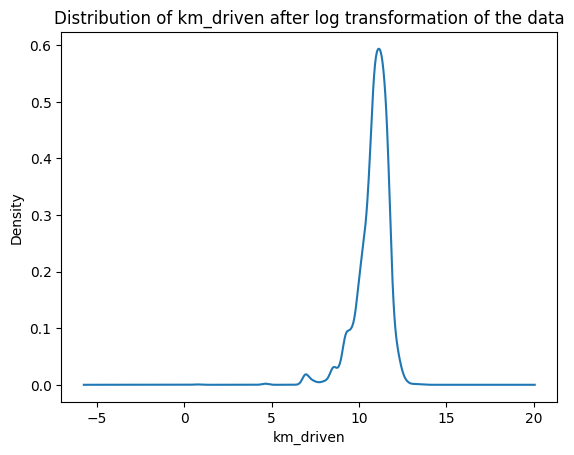

In [48]:
plt.figure()
X_train.km_driven.plot(kind = 'kde')
plt.title('Distribution of km_driven after log transformation of the data')
plt.xlabel('km_driven')
plt.show()

### 7. Plot the distribution of 3 variables of your choice against the dependent variable - summarize interesting findings if any.

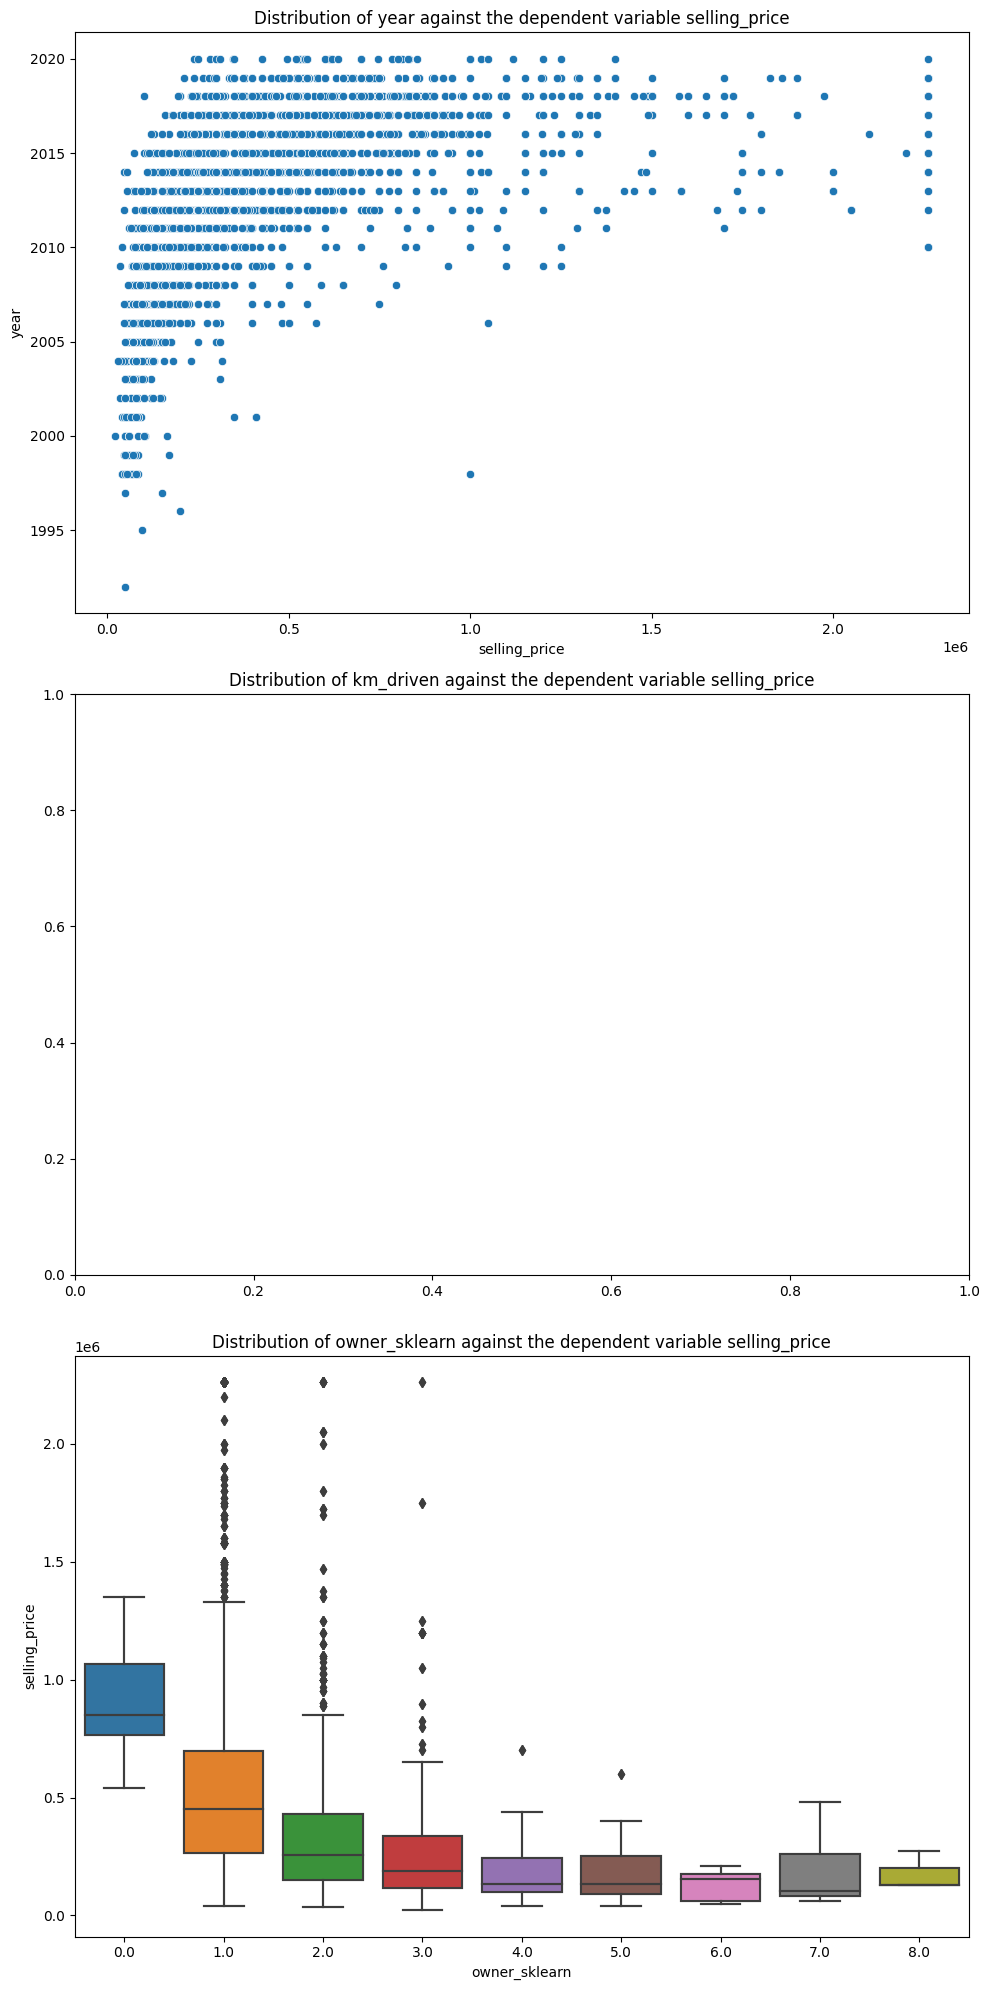

In [49]:
# your code here
f,axes = plt.subplots(3,1, figsize = (10,20))
axes = axes.flatten()
variables = ['year','km_driven','owner_sklearn']
for index,column in enumerate(variables):
  if column == 'owner':
    sns.kdeplot(x = y_train, hue = X_train[column], ax = axes[index])
  elif column == 'year':
    sns.scatterplot(x = y_train, y = X_train[column], ax = axes[index])
  else:
    sns.boxplot(x = X_train.owner_sklearn, y = y_train)
  axes[index].set_title(f'Distribution of {column} against the dependent variable selling_price')


plt.tight_layout()
plt.show()

We can see on the first graph a general trend where the more we are on a recent year, the more the selling price of the car will be high.

On the second graph we can see that km_driven is not very telling.

On the third graph, we can see that the newer the car is, the less expensive it will be.

### 8. Which features are correlated with each other? Include an appropriate visualization.

We would need to preprocess the features because for now we only have 3 numeric features

<ipython-input-50-a8accf5bd786>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = pd.concat([X_train,y_train],axis = 1).corr()


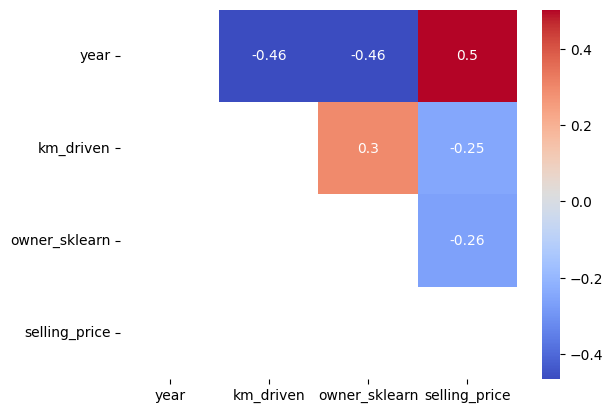

In [50]:
# your code here
corrs = pd.concat([X_train,y_train],axis = 1).corr()
mask = np.tril(np.ones_like(corrs))
sns.heatmap(corrs, annot = True, mask = mask,cmap = 'coolwarm')
plt.show()

We can see that year and selling_price are highly correlated which makes sens because the newer the car is, the more expensive it will be.

km_driven and selling_price are negatively correlated which make sense because the more the car will have kilometers, the more its price will decrease as it will get more used.

km_driven and year are highly negatively correlated which make sense because the more the car will be old, the more it will have chance to have been conduct a lot.

owner_sklearn and selling_price are negatively correlated which makes sense as the newer the car is, the more expensive it will be.

### 9. Preprocess 3 of the categorical features so that they can be used as input for some model.

###### Preprocessing of 'fuel'

In [51]:
X_train = pd.get_dummies(X_train, columns = ['fuel'])
X_test = pd.get_dummies(X_test, columns = ['fuel'])

We check if we have the same columns on train and test set

In [52]:
cols_to_add = set(X_train.columns) - set(X_test.columns)

In [53]:
cols_to_add

{'fuel_Electric'}

In [54]:
cols_to_del = set(X_test.columns) - set(X_train.columns)

In [55]:
cols_to_del

set()

In [56]:
X_test['fuel_Electric'] = 0

###### Preprocessing of transmission

In [57]:
X_train['transmission_manual'] = (X_train['transmission'] == 'Manual').astype(int)

In [58]:
X_test['transmission_manual'] = (X_test['transmission'] == 'Manual').astype(int)

In [59]:
X_train.drop(columns = ['transmission'], inplace = True)
X_test.drop(columns = ['transmission'], inplace = True)

###### Preprocessing of seller_type

In [60]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoder.fit(X_train[['seller_type']])
train_encoder_df = pd.DataFrame(encoder.transform(X_train[['seller_type']]),
                                columns = encoder.get_feature_names_out(['seller_type']), index = X_train.index)
X_train = pd.concat([X_train,train_encoder_df], axis=1).drop(columns = ['seller_type'])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [61]:
X_train.head()

,name,year,km_driven,owner_sklearn,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,transmission_manual,seller_type_Dealer,seller_type_Indi,seller_type_Individual,seller_type_Trustmark Dealer
227,Mahindra Scorpio S11 BSIV,2017,9.903538,1.0,0,1,0,0,0,1,0.0,0.0,1.0,0.0
964,Maruti Swift Dzire VDI,2018,10.819798,1.0,0,1,0,0,0,1,0.0,0.0,1.0,0.0
2045,Maruti Alto 800 LXI,2013,10.126671,2.0,0,0,0,0,1,1,0.0,0.0,1.0,0.0
1025,Chevrolet Beat Diesel LS,2011,11.156265,1.0,0,1,0,0,0,1,0.0,0.0,1.0,0.0
4242,Maruti Vitara Brezza LDi Option,2017,11.184435,1.0,0,1,0,0,0,1,1.0,0.0,0.0,0.0


In [62]:
test_encoder_df = pd.DataFrame(encoder.transform(X_test[['seller_type']]),
                                columns = encoder.get_feature_names_out(['seller_type']), index = X_test.index)
X_test = pd.concat([X_test,test_encoder_df], axis = 1).drop(columns = ['seller_type'])

### 10. Does it make sense to transform any of the numerical features? Explain your logic and apply any relevant transformations.

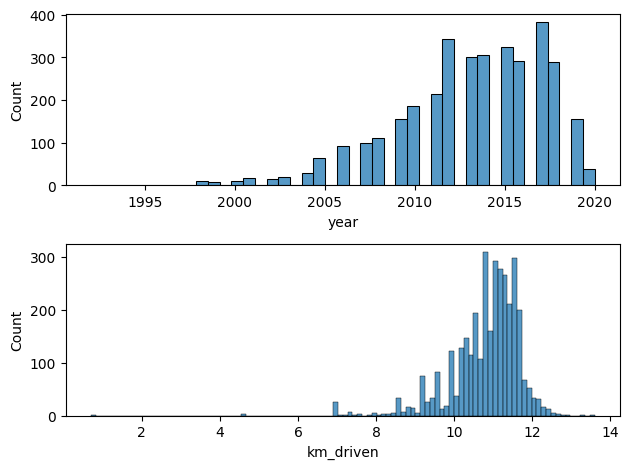

In [63]:
# your code here
f,axes = plt.subplots(2,1)
axes = axes.flatten()
sns.histplot(x = X_train.year, ax = axes[0])
sns.histplot(x = X_train.km_driven,ax= axes[1])

plt.tight_layout()
plt.show()


In [64]:
X_train.year.mean(), X_train.km_driven.mean()

(2013.116104868914, 10.811044623366572)

We see that our 2 numerical features are on very different scale so it would be useful to transform them.

We can use the StandardScaler as we do not have outliers anymore.



In [65]:
X_train[['year','km_driven']]

,year,km_driven
227,2017,9.903538
964,2018,10.819798
2045,2013,10.126671
1025,2011,11.156265
4242,2017,11.184435
...,...,...
3444,2006,10.819798
466,2011,11.289794
3092,2016,10.839601
3772,2013,11.289794


In [66]:
scaler = StandardScaler()

scaler.fit(X_train[['year','km_driven']])
X_train[['year','km_driven']] = scaler.transform(X_train[['year','km_driven']])
X_test[['year','km_driven']] = scaler.transform(X_test[['year','km_driven']])

In [67]:
X_train.head()

,name,year,km_driven,owner_sklearn,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,transmission_manual,seller_type_Dealer,seller_type_Indi,seller_type_Individual,seller_type_Trustmark Dealer
227,Mahindra Scorpio S11 BSIV,0.923548,-1.003047,1.0,0,1,0,0,0,1,0.0,0.0,1.0,0.0
964,Maruti Swift Dzire VDI,1.161337,0.009675,1.0,0,1,0,0,0,1,0.0,0.0,1.0,0.0
2045,Maruti Alto 800 LXI,-0.027608,-0.756423,2.0,0,0,0,0,1,1,0.0,0.0,1.0,0.0
1025,Chevrolet Beat Diesel LS,-0.503187,0.381564,1.0,0,1,0,0,0,1,0.0,0.0,1.0,0.0
4242,Maruti Vitara Brezza LDi Option,0.923548,0.412700,1.0,0,1,0,0,0,1,1.0,0.0,0.0,0.0


### 11. Drop any unneeded features so you are left only with features that we can use in a model. SEE HELPER FUNCTIONS

In [68]:
X_train.transmission_manual.value_counts()

1    3108
0     363
Name: transmission_manual, dtype: int64

In [69]:
# your code here
get_redundant_binary_cols(X_train,0.7)

['fuel_CNG',
 'fuel_Electric',
 'fuel_LPG',
 'seller_type_Dealer',
 'seller_type_Indi',
 'seller_type_Trustmark Dealer',
 'transmission_manual',
 'seller_type_Individual']

In [70]:
X_train.describe()

,year,km_driven,owner_sklearn,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,transmission_manual,seller_type_Dealer,seller_type_Indi,seller_type_Individual,seller_type_Trustmark Dealer
count,3.471000e+03,3.471000e+03,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000,3471.000000
mean,-1.194678e-14,1.705732e-15,1.471622,0.010084,0.494094,0.000288,0.005186,0.490349,0.895419,0.228753,0.000576,0.747911,0.022760
std,1.000144e+00,1.000144e+00,0.816077,0.099924,0.500037,0.016974,0.071836,0.499979,0.306057,0.420090,0.024001,0.434274,0.149159
min,-5.021179e+00,-1.118309e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.031866e-01,-3.845402e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.101806e-01,2.111875e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,6.857588e-01,6.593329e-01,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.636915e+00,3.083215e+00,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We drop the column transmission_manual because we have too many manual values so this feature wont give us many relevant informations.

In [71]:
X_train.drop(columns = ['transmission_manual'], inplace = True)

In [72]:
X_test.drop(columns = ['transmission_manual'], inplace = True)

We concat all the minor seller type into one

In [73]:
X_train['seller_type_others'] = X_train['seller_type_Dealer'] + X_train['seller_type_Indi'] + X_train['seller_type_Trustmark Dealer']
X_train.drop(columns = ['seller_type_Dealer','seller_type_Indi', 'seller_type_Trustmark Dealer'], inplace = True)


In [74]:
X_test['seller_type_others'] = X_test['seller_type_Dealer'] + X_test['seller_type_Indi'] + X_test['seller_type_Trustmark Dealer']
X_test.drop(columns = ['seller_type_Dealer','seller_type_Indi', 'seller_type_Trustmark Dealer'], inplace = True)

We drop the column 'name' because it does not give any relevant information.

In [75]:
X_train.drop(columns = ['name'], inplace = True)
X_test.drop(columns = ['name'], inplace = True)

In [76]:
X_test = X_test[X_train.columns]

## 12. Bonus

### Perform linear regression on the data. plot the distribution of your predictions

In [77]:
# your code here
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


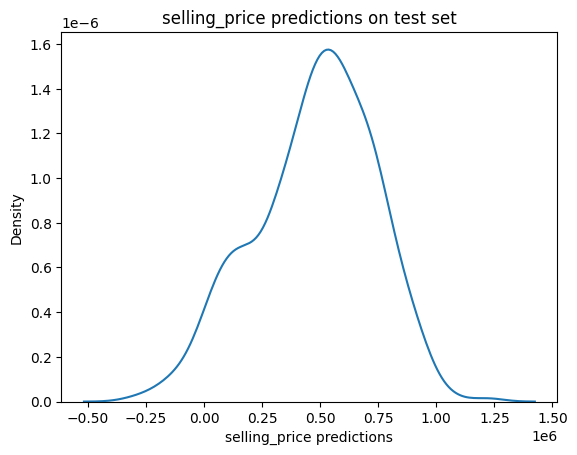

In [78]:
sns.kdeplot(y_pred)
plt.title('selling_price predictions on test set')
plt.xlabel('selling_price predictions')
plt.show()

### Test your linear regression with the test set, and present the RMSE value of your result. What is your conclusion?

In [79]:
# your code here
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [80]:
rmse

479915.5786970906

In [81]:
y_test.median()

352500.0

Our rmse is 1.5* bigger than the median of our data so our features are not good predictors of the target variable.